In [2]:
using PyPlot

In [3]:
# PyPlot does not works so no plots in this code 
using Ensemble
using CARMA
using PyCall

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] @vectorize_2arg(::ANY, ::ANY) at ./deprecated.jl:339
 [3] include_from_node1(::String) at ./loading.jl:576
 [4] include(::String) at ./sysimg.jl:14
 [5] include_from_node1(::String) at ./loading.jl:576
 [6] eval(::Module, ::Any) at ./boot.jl:235
 [7] _require(::Symbol) at ./loading.jl:490
 [8] require(::Symbol) at ./loading.jl:405
 [9] include_string(::String, ::String) at ./loading.jl:522
 [10] include_string(::Module, ::String, ::String) at /Users/nevencaplar/.julia/v0.6/Compat/src/Compat.jl:71
 [11] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/nevencaplar/.julia/v0.6/IJulia/src/execute_request.jl:158
 [12] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/nevencaplar/.julia/v0.6/Compat/src/Compat.jl:385
 [13] eventloop(::ZMQ.Socket) at /Users/nevencaplar/.julia/v0.6/IJulia/src/eventloop.jl:8
 [14] (::IJulia.##14#17)() at ./task.jl:335
while loading /User

In [79]:
xb158i = readdlm("/Users/nevencaplar/Documents/Variability/Farr/CARMATutorial-master/Data/res7.dat",Float32)

80×3 Array{Float32,2}:
   8.44602  -18.762  0.052
  10.8041   -18.704  0.069
  13.0659   -18.9    0.059
  13.9773   -18.9    0.042
  15.3765   -18.947  0.047
  17.7174   -18.824  0.041
  19.5731   -18.923  0.068
  19.8913   -18.923  0.049
  20.0033   -19.09   0.067
  25.9271   -19.23   0.064
  25.8281   -19.23   0.05 
  31.6091   -19.172  0.05 
  33.4524   -19.048  0.045
  35.7414   -19.133  0.051
  36.8068   -18.483  0.066
  37.7394   -18.847  0.047
  40.6437   -18.89   0.051
  41.0864   -19.251  0.054
  42.3242   -18.425  0.054
   ⋮                      
 552.924    -18.978  0.087
 553.389    -19.165  0.049
 555.574    -18.765  0.056
 559.212    -19.081  0.04 
 559.47     -19.081  0.037
 559.822    -19.081  0.041
 560.398    -18.569  0.052
 565.762    -18.856  0.047
 567.205    -19.297  0.046
 568.617    -19.3    0.022
 570.745    -19.335  0.074
 571.744    -18.713  0.054
 578.686    -18.851  0.053
 578.809    -18.851  0.04 
 581.7      -18.726  0.064
 585.728    -19.131  0.062
 591.

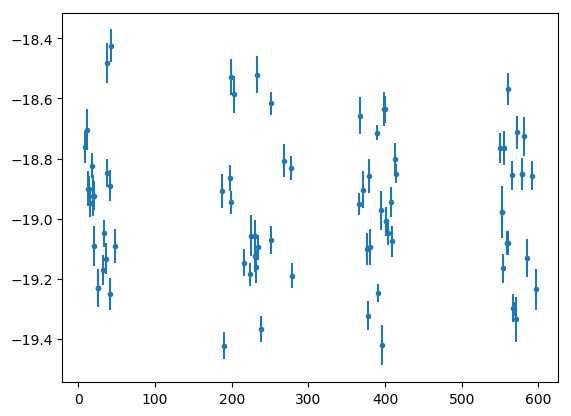

(PyObject <matplotlib.lines.Line2D object at 0x12c0ab710>, (), (PyObject <matplotlib.collections.LineCollection object at 0x12c0abb50>,))

In [80]:
errorbar(xb158i[:,1], xb158i[:,2], xb158i[:,3], fmt=".")

In [60]:
"""
function CARMAestimateFarr(data)
    p=2
    q=0
        
    # We construct the posterior object by giving it times, samples, and uncertainties.
    posterior = Kalman.CARMAKalmanPosterior(data[:,1], data[:,2], data[:,3], p, q)
    nlive = 1024
    print("Checkpoint 0")
    print(posterior)
    prior_pts = Kalman.init(posterior, nlive)
    print("Checkpoint 1")
    neststate = EnsembleNest.NestState(x -> Kalman.log_likelihood(posterior, x), x->Kalman.log_prior(posterior, x), prior_pts, 128)
    print("Checkpoint 2")
    @time EnsembleNest.run!(neststate,0.1)
    print("Checkpoint 3")
    postsamples32, lnlike32 = EnsembleNest.postsample(neststate)
    fmax = 1.0/(2*median(diff(data[:,1]))) # As if median dt were Nyquist
    df = 1.0/(data[end,1]-data[1,1]) # With spacing equal to 1/T
    fs = collect(df:df:fmax)
    psds = zeros(size(fs, 1), 1000)
    for i in 1:1000
        p = postsamples32[:, rand(1:size(postsamples32,2))] # Choose a random posterior sample
        psds[:,i] = Kalman.psd(posterior, p, fs)
    end
    
    pmin = zeros(size(fs, 1))
    pmax = zeros(size(fs, 1))
    pmed = zeros(size(fs, 1))
    for i in 1:size(fs, 1)
        pmin[i] = quantile(vec(psds[i,:]), 0.025)
        pmed[i] = median(vec(psds[i,:]))
        pmax[i] = quantile(vec(psds[i,:]), 0.975)
    end

    cd("/Users/nevencaplar/Documents/Variability/CARMA2017/Testing_Results_Julia/")
    for_output=cat(1,fs,pmin,pmed,pmax)
    writedlm(join(["test","_res_Farr.txt"]), for_output)
end
"""

CARMAestimateFarr (generic function with 1 method)

In [81]:
posterior = Kalman.CARMAKalmanPosterior(sort(xb158i[:,1]), xb158i[:,2], xb158i[:,3], 2, 0)

CARMA.Kalman.CARMAKalmanPosterior([8.44602, 10.8041, 13.0659, 13.9773, 15.3765, 17.7174, 19.5731, 19.8913, 20.0033, 25.8281  …  567.205, 568.617, 570.745, 571.744, 578.686, 578.809, 581.7, 585.728, 591.584, 596.686], [-18.762, -18.704, -18.9, -18.9, -18.947, -18.824, -18.923, -18.923, -19.09, -19.23  …  -19.297, -19.3, -19.335, -18.713, -18.851, -18.851, -18.726, -19.131, -18.857, -19.234], [0.052, 0.069, 0.059, 0.042, 0.047, 0.041, 0.068, 0.049, 0.067, 0.064  …  0.046, 0.022, 0.074, 0.054, 0.053, 0.04, 0.064, 0.062, 0.048, 0.068], 2, 0)

In [82]:
nlive = 1024
prior_pts = Kalman.init(posterior, nlive)

5×1024 Array{Float64,2}:
 -20.1634    -18.6486     -19.5494    -19.3119    …  -19.9366    -20.7399    -21.0301    -18.7006  
   0.030204    0.0856937    1.83413     0.401447       0.164898    0.910745    0.184843    0.138112
   4.55604     2.11319      0.783828    0.478823       0.208873    0.157244    6.11498     3.06026 
   2.12194    -1.24202     -4.84583    -1.70558       -5.24646    -2.07883    -1.31183    -4.74112 
  -2.67896     3.04702     -4.3785      4.13958       -3.14211     3.3071     -4.00885    -3.64498 

In [83]:
neststate = EnsembleNest.NestState(x -> Kalman.log_likelihood(posterior, x), x->Kalman.log_prior(posterior, x), prior_pts, 128)

Ensemble.EnsembleNest.NestState(#13, #14, 128, 128.0, [-20.1634 -18.6486 … -21.0301 -18.7006; 0.030204 0.0856937 … 0.184843 0.138112; … ; 2.12194 -1.24202 … -1.31183 -4.74112; -2.67896 3.04702 … -4.00885 -3.64498], [1.98333, 1.70878, -0.363003, 1.6491, -1.48668, 1.8611, 0.0938593, 2.04734, 0.246677, -1.44189  …  4.17745, -1.37172, -0.308323, 0.976213, 2.52437, 3.25254, 3.36846, 1.94345, -0.122496, 0.861194], [-798.745, -294.464, -518.817, -192.142, -24.0032, -809.517, -22.8373, -2518.98, -576.547, -181.212  …  -17069.3, -80.444, -6.54984, -1113.75, -2779.63, -15844.3, -22565.4, -1209.69, -475.268, -111.028], Array{Float64}(5,0), Float64[], Float64[], 0.0, -Inf)

In [84]:
@time EnsembleNest.run!(neststate, 0.1)

Retired point with ll = -870215.0718007045; accept = 0.2734375; next nmcmc = 128
Retired point with ll = -606686.85275175; accept = 0.1640625; next nmcmc = 128
Retired point with ll = -583515.7896608473; accept = 0.171875; next nmcmc = 128
Retired point with ll = -415379.9489357189; accept = 0.171875; next nmcmc = 128
Retired point with ll = -368217.5384974378; accept = 0.2578125; next nmcmc = 128
Retired point with ll = -298417.67472846335; accept = 0.1328125; next nmcmc = 128
Retired point with ll = -275161.9439007338; accept = 0.2421875; next nmcmc = 128
Retired point with ll = -262685.4034618842; accept = 0.25; next nmcmc = 128
Retired point with ll = -251529.20076590427; accept = 0.2109375; next nmcmc = 128
Retired point with ll = -240020.5739988945; accept = 0.2578125; next nmcmc = 128
Retired point with ll = -203656.47157612065; accept = 0.046875; next nmcmc = 128
Retired point with ll = -192253.98824990817; accept = 0.328125; next nmcmc = 128
Retired point with ll = -177797.282

Retired point with ll = -25072.144806303717; accept = 0.16129032258064516; next nmcmc = 124
Retired point with ll = -24245.13233084454; accept = 0.3064516129032258; next nmcmc = 124
Retired point with ll = -23666.328466818806; accept = 0.20967741935483872; next nmcmc = 124
Retired point with ll = -23423.98296606425; accept = 0.16129032258064516; next nmcmc = 124
Retired point with ll = -23413.854866681217; accept = 0.25; next nmcmc = 124
Retired point with ll = -23353.63525850838; accept = 0.3709677419354839; next nmcmc = 124
Retired point with ll = -23037.788729501117; accept = 0.3951612903225806; next nmcmc = 124
Retired point with ll = -22821.091726181265; accept = 0.20161290322580644; next nmcmc = 124
Retired point with ll = -22801.04620259472; accept = 0.18548387096774194; next nmcmc = 124
Retired point with ll = -22710.58549856749; accept = 0.41935483870967744; next nmcmc = 124
Retired point with ll = -22565.37670125171; accept = 0.2661290322580645; next nmcmc = 124
Retired point

Retired point with ll = -8732.878385479762; accept = 0.256198347107438; next nmcmc = 121
Retired point with ll = -8726.664678187231; accept = 0.24793388429752067; next nmcmc = 121
Retired point with ll = -8667.232358593792; accept = 0.2727272727272727; next nmcmc = 121
Retired point with ll = -8460.70434114829; accept = 0.21487603305785125; next nmcmc = 121
Retired point with ll = -8459.873217229515; accept = 0.2231404958677686; next nmcmc = 121
Retired point with ll = -8436.49222103112; accept = 0.18181818181818182; next nmcmc = 121
Retired point with ll = -8435.757619188396; accept = 0.19008264462809918; next nmcmc = 121
Retired point with ll = -8387.447274202857; accept = 0.35537190082644626; next nmcmc = 120
Retired point with ll = -8195.46214895922; accept = 0.25; next nmcmc = 120
Retired point with ll = -8133.322988515877; accept = 0.10833333333333334; next nmcmc = 120
Retired point with ll = -8126.584463361735; accept = 0.08333333333333333; next nmcmc = 121
Retired point with ll

Retired point with ll = -3964.4438424129253; accept = 0.2288135593220339; next nmcmc = 118
Retired point with ll = -3903.3760908311574; accept = 0.15254237288135594; next nmcmc = 118
Retired point with ll = -3858.2566879473507; accept = 0.2542372881355932; next nmcmc = 118
Retired point with ll = -3855.3681225811874; accept = 0.3474576271186441; next nmcmc = 118
Retired point with ll = -3823.2200350373814; accept = 0.1864406779661017; next nmcmc = 118
Retired point with ll = -3803.0553300325687; accept = 0.1440677966101695; next nmcmc = 118
Retired point with ll = -3781.8420352998755; accept = 0.2711864406779661; next nmcmc = 118
Retired point with ll = -3768.3249806796325; accept = 0.1271186440677966; next nmcmc = 118
Retired point with ll = -3746.811341026038; accept = 0.15254237288135594; next nmcmc = 118
Retired point with ll = -3745.1088241290704; accept = 0.3050847457627119; next nmcmc = 118
Retired point with ll = -3743.188095964471; accept = 0.2457627118644068; next nmcmc = 118

Retired point with ll = -2231.2521342195687; accept = 0.3565217391304348; next nmcmc = 115
Retired point with ll = -2225.1957585743517; accept = 0.20869565217391303; next nmcmc = 115
Retired point with ll = -2222.0144444994125; accept = 0.20869565217391303; next nmcmc = 115
Retired point with ll = -2216.7708339591823; accept = 0.30434782608695654; next nmcmc = 115
Retired point with ll = -2215.130991866502; accept = 0.0782608695652174; next nmcmc = 115
Retired point with ll = -2214.86067476612; accept = 0.30434782608695654; next nmcmc = 115
Retired point with ll = -2208.9979720393476; accept = 0.34782608695652173; next nmcmc = 115
Retired point with ll = -2187.408516663839; accept = 0.12173913043478261; next nmcmc = 115
Retired point with ll = -2187.3803378862135; accept = 0.2956521739130435; next nmcmc = 115
Retired point with ll = -2178.6851632587627; accept = 0.26956521739130435; next nmcmc = 115
Retired point with ll = -2174.8405705498126; accept = 0.21739130434782608; next nmcmc =

Retired point with ll = -1392.3399290000225; accept = 0.3125; next nmcmc = 112
Retired point with ll = -1386.5007636441449; accept = 0.15178571428571427; next nmcmc = 112
Retired point with ll = -1384.934372223902; accept = 0.25892857142857145; next nmcmc = 112
Retired point with ll = -1381.4823883844635; accept = 0.14285714285714285; next nmcmc = 112
Retired point with ll = -1380.7349202365563; accept = 0.14285714285714285; next nmcmc = 112
Retired point with ll = -1379.0148277999385; accept = 0.15178571428571427; next nmcmc = 112
Retired point with ll = -1377.9973406421223; accept = 0.26785714285714285; next nmcmc = 112
Retired point with ll = -1376.7458811060276; accept = 0.26785714285714285; next nmcmc = 112
Retired point with ll = -1372.9192402305655; accept = 0.25892857142857145; next nmcmc = 112
Retired point with ll = -1360.9888045211926; accept = 0.24107142857142858; next nmcmc = 112
Retired point with ll = -1357.7814685654748; accept = 0.4017857142857143; next nmcmc = 112
Ret

Retired point with ll = -968.3105835251741; accept = 0.34545454545454546; next nmcmc = 110
Retired point with ll = -968.2608275485767; accept = 0.09090909090909091; next nmcmc = 110
Retired point with ll = -965.0992167548542; accept = 0.2545454545454545; next nmcmc = 110
Retired point with ll = -961.1043428646066; accept = 0.2636363636363636; next nmcmc = 110
Retired point with ll = -959.0472797203663; accept = 0.2818181818181818; next nmcmc = 110
Retired point with ll = -958.2650808789426; accept = 0.2636363636363636; next nmcmc = 110
Retired point with ll = -957.0555028671222; accept = 0.18181818181818182; next nmcmc = 110
Retired point with ll = -953.8348257098289; accept = 0.12727272727272726; next nmcmc = 110
Retired point with ll = -953.4071236130937; accept = 0.35454545454545455; next nmcmc = 110
Retired point with ll = -952.8597019169304; accept = 0.17272727272727273; next nmcmc = 110
Retired point with ll = -952.0276088547798; accept = 0.20909090909090908; next nmcmc = 110
Ret

Retired point with ll = -668.8426541712945; accept = 0.2523364485981308; next nmcmc = 107
Retired point with ll = -665.0853734299802; accept = 0.3644859813084112; next nmcmc = 107
Retired point with ll = -663.5545734942743; accept = 0.2523364485981308; next nmcmc = 107
Retired point with ll = -662.7970276293248; accept = 0.21495327102803738; next nmcmc = 107
Retired point with ll = -661.3844270751717; accept = 0.2803738317757009; next nmcmc = 107
Retired point with ll = -659.7361725144419; accept = 0.29906542056074764; next nmcmc = 107
Retired point with ll = -659.281331948723; accept = 0.205607476635514; next nmcmc = 107
Retired point with ll = -658.6690602785777; accept = 0.34579439252336447; next nmcmc = 107
Retired point with ll = -657.1493154808712; accept = 0.1588785046728972; next nmcmc = 107
Retired point with ll = -651.3559696739246; accept = 0.1588785046728972; next nmcmc = 107
Retired point with ll = -650.1434505503461; accept = 0.22429906542056074; next nmcmc = 107
Retired 

Retired point with ll = -459.9738897399019; accept = 0.2641509433962264; next nmcmc = 106
Retired point with ll = -457.51404178259975; accept = 0.2358490566037736; next nmcmc = 106
Retired point with ll = -448.6818751772097; accept = 0.19811320754716982; next nmcmc = 106
Retired point with ll = -448.5278928490156; accept = 0.19811320754716982; next nmcmc = 106
Retired point with ll = -446.3811204984168; accept = 0.29245283018867924; next nmcmc = 106
Retired point with ll = -438.6921162228798; accept = 0.2641509433962264; next nmcmc = 105
Retired point with ll = -438.6688989809069; accept = 0.14285714285714285; next nmcmc = 105
Retired point with ll = -437.2892079823435; accept = 0.22857142857142856; next nmcmc = 105
Retired point with ll = -436.7590800782177; accept = 0.3047619047619048; next nmcmc = 105
Retired point with ll = -435.9265750871177; accept = 0.14285714285714285; next nmcmc = 105
Retired point with ll = -435.7390498612855; accept = 0.3047619047619048; next nmcmc = 105
Ret

Retired point with ll = -305.075029417719; accept = 0.1553398058252427; next nmcmc = 103
Retired point with ll = -303.7651388068277; accept = 0.2815533980582524; next nmcmc = 103
Retired point with ll = -303.5747497805482; accept = 0.3106796116504854; next nmcmc = 103
Retired point with ll = -303.55520472243654; accept = 0.2621359223300971; next nmcmc = 103
Retired point with ll = -302.8454123665602; accept = 0.21359223300970873; next nmcmc = 103
Retired point with ll = -301.39830380284894; accept = 0.3592233009708738; next nmcmc = 103
Retired point with ll = -301.39634468287704; accept = 0.1650485436893204; next nmcmc = 103
Retired point with ll = -301.2314423564479; accept = 0.1650485436893204; next nmcmc = 103
Retired point with ll = -299.7334357057559; accept = 0.13592233009708737; next nmcmc = 103
Retired point with ll = -299.3673691572984; accept = 0.3300970873786408; next nmcmc = 103
Retired point with ll = -298.1987366882534; accept = 0.10679611650485436; next nmcmc = 103
Retir

Retired point with ll = -219.22175573103985; accept = 0.30392156862745096; next nmcmc = 102
Retired point with ll = -219.1333149042486; accept = 0.2549019607843137; next nmcmc = 102
Retired point with ll = -218.5646221637088; accept = 0.3235294117647059; next nmcmc = 102
Retired point with ll = -217.77137292319074; accept = 0.3627450980392157; next nmcmc = 102
Retired point with ll = -217.3165409536773; accept = 0.3431372549019608; next nmcmc = 102
Retired point with ll = -216.75733264639118; accept = 0.19607843137254902; next nmcmc = 102
Retired point with ll = -216.05724342199142; accept = 0.21568627450980393; next nmcmc = 101
Retired point with ll = -215.86299723610205; accept = 0.18811881188118812; next nmcmc = 101
Retired point with ll = -214.5939526610622; accept = 0.297029702970297; next nmcmc = 101
Retired point with ll = -214.05152923158627; accept = 0.0594059405940594; next nmcmc = 102
Retired point with ll = -212.8914483430143; accept = 0.12745098039215685; next nmcmc = 102


Retired point with ll = -170.87130161731295; accept = 0.31683168316831684; next nmcmc = 101
Retired point with ll = -170.1694540103618; accept = 0.27722772277227725; next nmcmc = 101
Retired point with ll = -169.9852777116954; accept = 0.40594059405940597; next nmcmc = 101
Retired point with ll = -169.90656492894624; accept = 0.32673267326732675; next nmcmc = 101
Retired point with ll = -169.81562859646493; accept = 0.1782178217821782; next nmcmc = 101
Retired point with ll = -169.6932668732902; accept = 0.1188118811881188; next nmcmc = 101
Retired point with ll = -169.6671681936674; accept = 0.33663366336633666; next nmcmc = 101
Retired point with ll = -169.37106130573366; accept = 0.15841584158415842; next nmcmc = 101
Retired point with ll = -169.02114522933493; accept = 0.32673267326732675; next nmcmc = 101
Retired point with ll = -168.43012673017745; accept = 0.16831683168316833; next nmcmc = 101
Retired point with ll = -168.22674708601022; accept = 0.18811881188118812; next nmcmc 

Retired point with ll = -131.42698529540965; accept = 0.27722772277227725; next nmcmc = 101
Retired point with ll = -131.26516625937896; accept = 0.3465346534653465; next nmcmc = 101
Retired point with ll = -130.97017898338154; accept = 0.22772277227722773; next nmcmc = 101
Retired point with ll = -130.66000735326335; accept = 0.36633663366336633; next nmcmc = 101
Retired point with ll = -130.30663376260793; accept = 0.25742574257425743; next nmcmc = 101
Retired point with ll = -130.0323034582894; accept = 0.45544554455445546; next nmcmc = 101
Retired point with ll = -129.6790216713285; accept = 0.21782178217821782; next nmcmc = 101
Retired point with ll = -129.62821608599538; accept = 0.15841584158415842; next nmcmc = 101
Retired point with ll = -129.46802355639423; accept = 0.297029702970297; next nmcmc = 101
Retired point with ll = -129.43051755057886; accept = 0.0594059405940594; next nmcmc = 101
Retired point with ll = -129.25483891839812; accept = 0.07920792079207921; next nmcmc 

Retired point with ll = -110.08346512114544; accept = 0.3333333333333333; next nmcmc = 102
Retired point with ll = -110.06976438094948; accept = 0.08823529411764706; next nmcmc = 102
Retired point with ll = -109.96170270772507; accept = 0.2549019607843137; next nmcmc = 102
Retired point with ll = -109.10808923401817; accept = 0.19607843137254902; next nmcmc = 102
Retired point with ll = -108.93400029273063; accept = 0.2647058823529412; next nmcmc = 102
Retired point with ll = -108.93363236405332; accept = 0.27450980392156865; next nmcmc = 102
Retired point with ll = -108.89425378627273; accept = 0.30392156862745096; next nmcmc = 102
Retired point with ll = -108.75552058765764; accept = 0.3137254901960784; next nmcmc = 102
Retired point with ll = -108.57942228772617; accept = 0.21568627450980393; next nmcmc = 102
Retired point with ll = -108.50017405025999; accept = 0.21568627450980393; next nmcmc = 102
Retired point with ll = -108.06106458505373; accept = 0.2647058823529412; next nmcmc

Retired point with ll = -92.16866834129684; accept = 0.17; next nmcmc = 100
Retired point with ll = -92.14407041312678; accept = 0.12; next nmcmc = 101
Retired point with ll = -92.10536863131288; accept = 0.22772277227722773; next nmcmc = 101
Retired point with ll = -92.01192199569121; accept = 0.40594059405940597; next nmcmc = 100
Retired point with ll = -91.90048773349072; accept = 0.32; next nmcmc = 100
Retired point with ll = -91.8335965117176; accept = 0.21; next nmcmc = 100
Retired point with ll = -91.74145236514279; accept = 0.24; next nmcmc = 100
Retired point with ll = -91.69510815314987; accept = 0.3; next nmcmc = 100
Retired point with ll = -91.60094153802073; accept = 0.27; next nmcmc = 100
Retired point with ll = -91.59740911543534; accept = 0.14; next nmcmc = 100
Retired point with ll = -91.4862668857837; accept = 0.33; next nmcmc = 100
Retired point with ll = -91.46741473792996; accept = 0.23; next nmcmc = 100
Retired point with ll = -91.3514457291555; accept = 0.31; nex

Retired point with ll = -81.3405693109806; accept = 0.26; next nmcmc = 100
Retired point with ll = -81.29884595190447; accept = 0.27; next nmcmc = 100
Retired point with ll = -81.16133381411943; accept = 0.22; next nmcmc = 100
Retired point with ll = -81.1193231721258; accept = 0.31; next nmcmc = 100
Retired point with ll = -81.1095178762529; accept = 0.16; next nmcmc = 100
Retired point with ll = -80.9417834638003; accept = 0.12; next nmcmc = 100
Retired point with ll = -80.91005862167587; accept = 0.22; next nmcmc = 100
Retired point with ll = -80.89556538778152; accept = 0.2; next nmcmc = 100
Retired point with ll = -80.87787779854348; accept = 0.26; next nmcmc = 100
Retired point with ll = -80.85064023931157; accept = 0.18; next nmcmc = 100
Retired point with ll = -80.63917079221872; accept = 0.21; next nmcmc = 100
Retired point with ll = -80.5047020631264; accept = 0.16; next nmcmc = 100
Retired point with ll = -80.48374981447353; accept = 0.16; next nmcmc = 100
Retired point with

Retired point with ll = -71.60569624441261; accept = 0.28; next nmcmc = 100
Retired point with ll = -71.60298835701533; accept = 0.24; next nmcmc = 100
Retired point with ll = -71.60035991167197; accept = 0.28; next nmcmc = 100
Retired point with ll = -71.5320404263058; accept = 0.11; next nmcmc = 100
Retired point with ll = -71.48421054086569; accept = 0.21; next nmcmc = 100
Retired point with ll = -71.36275951967144; accept = 0.3; next nmcmc = 100
Retired point with ll = -71.33210511139981; accept = 0.21; next nmcmc = 100
Retired point with ll = -71.1687235876738; accept = 0.26; next nmcmc = 100
Retired point with ll = -71.10380308776104; accept = 0.32; next nmcmc = 100
Retired point with ll = -71.08712149043406; accept = 0.29; next nmcmc = 99
Retired point with ll = -70.77300194928198; accept = 0.3434343434343434; next nmcmc = 99
Retired point with ll = -70.76162232873756; accept = 0.10101010101010101; next nmcmc = 100
Retired point with ll = -70.67705955973443; accept = 0.21; next 

Retired point with ll = -62.463539114818786; accept = 0.21; next nmcmc = 100
Retired point with ll = -62.4248536180331; accept = 0.31; next nmcmc = 100
Retired point with ll = -62.38077050680139; accept = 0.25; next nmcmc = 100
Retired point with ll = -62.352691346965784; accept = 0.19; next nmcmc = 100
Retired point with ll = -62.34595805774715; accept = 0.35; next nmcmc = 100
Retired point with ll = -62.19008003114157; accept = 0.26; next nmcmc = 100
Retired point with ll = -62.18102013995996; accept = 0.41; next nmcmc = 100
Retired point with ll = -62.175597899742264; accept = 0.14; next nmcmc = 100
Retired point with ll = -62.127729655665554; accept = 0.18; next nmcmc = 100
Retired point with ll = -62.039709097910155; accept = 0.12; next nmcmc = 100
Retired point with ll = -62.03499214587828; accept = 0.29; next nmcmc = 100
Retired point with ll = -61.918027262500985; accept = 0.15; next nmcmc = 100
Retired point with ll = -61.8397639617254; accept = 0.26; next nmcmc = 100
Retired 

Retired point with ll = -55.60950180190789; accept = 0.19; next nmcmc = 100
Retired point with ll = -55.58812875641911; accept = 0.28; next nmcmc = 100
Retired point with ll = -55.51828689450629; accept = 0.17; next nmcmc = 100
Retired point with ll = -55.48786662273514; accept = 0.14; next nmcmc = 100
Retired point with ll = -55.48247212833043; accept = 0.11; next nmcmc = 100
Retired point with ll = -55.46522877745222; accept = 0.24; next nmcmc = 100
Retired point with ll = -55.45329247092838; accept = 0.14; next nmcmc = 100
Retired point with ll = -55.452598067762956; accept = 0.24; next nmcmc = 100
Retired point with ll = -55.400425559778554; accept = 0.27; next nmcmc = 100
Retired point with ll = -55.37671810446301; accept = 0.24; next nmcmc = 100
Retired point with ll = -55.27593964242958; accept = 0.32; next nmcmc = 100
Retired point with ll = -55.253490306809404; accept = 0.38; next nmcmc = 100
Retired point with ll = -55.16232895395057; accept = 0.18; next nmcmc = 100
Retired p

Retired point with ll = -50.235296339558246; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -50.221541906552176; accept = 0.25252525252525254; next nmcmc = 99
Retired point with ll = -50.18582290399512; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -50.046613278830435; accept = 0.24242424242424243; next nmcmc = 99
Retired point with ll = -50.038297672219066; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -49.98018376295055; accept = 0.26262626262626265; next nmcmc = 99
Retired point with ll = -49.96252999779609; accept = 0.20202020202020202; next nmcmc = 99
Retired point with ll = -49.917152379674256; accept = 0.050505050505050504; next nmcmc = 100
Retired point with ll = -49.90709518380856; accept = 0.34; next nmcmc = 100
Retired point with ll = -49.828431549483305; accept = 0.17; next nmcmc = 100
Retired point with ll = -49.824033263765365; accept = 0.3; next nmcmc = 100
Retired point with ll = -49.82303507543992; acc

Retired point with ll = -45.51467739252195; accept = 0.31313131313131315; next nmcmc = 99
Retired point with ll = -45.418907819652716; accept = 0.050505050505050504; next nmcmc = 99
Retired point with ll = -45.367795206928; accept = 0.30303030303030304; next nmcmc = 99
Retired point with ll = -45.34287945586733; accept = 0.13131313131313133; next nmcmc = 99
Retired point with ll = -45.333792155909194; accept = 0.08080808080808081; next nmcmc = 99
Retired point with ll = -45.329595052857144; accept = 0.23232323232323232; next nmcmc = 99
Retired point with ll = -45.29889106905098; accept = 0.3333333333333333; next nmcmc = 99
Retired point with ll = -45.27117396323071; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -45.268047401151705; accept = 0.29292929292929293; next nmcmc = 99
Retired point with ll = -45.16561279713616; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -45.09119180519762; accept = 0.29292929292929293; next nmcmc = 99
Retired po

Retired point with ll = -41.42786022789578; accept = 0.21428571428571427; next nmcmc = 98
Retired point with ll = -41.391516462599355; accept = 0.21428571428571427; next nmcmc = 98
Retired point with ll = -41.38567821583005; accept = 0.04081632653061224; next nmcmc = 98
Retired point with ll = -41.34717747970417; accept = 0.1836734693877551; next nmcmc = 98
Retired point with ll = -41.27006513686171; accept = 0.2755102040816326; next nmcmc = 98
Retired point with ll = -41.26757238305739; accept = 0.05102040816326531; next nmcmc = 99
Retired point with ll = -41.26199226858186; accept = 0.16161616161616163; next nmcmc = 99
Retired point with ll = -41.24304373442926; accept = 0.20202020202020202; next nmcmc = 99
Retired point with ll = -41.23158422337772; accept = 0.31313131313131315; next nmcmc = 99
Retired point with ll = -41.14355182300563; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -41.123945007425945; accept = 0.37373737373737376; next nmcmc = 98
Retired poi

Retired point with ll = -37.6851944695491; accept = 0.22448979591836735; next nmcmc = 98
Retired point with ll = -37.678059194681545; accept = 0.20408163265306123; next nmcmc = 98
Retired point with ll = -37.67596540560349; accept = 0.15306122448979592; next nmcmc = 98
Retired point with ll = -37.61611605910107; accept = 0.05102040816326531; next nmcmc = 98
Retired point with ll = -37.58922845455471; accept = 0.16326530612244897; next nmcmc = 98
Retired point with ll = -37.53667244870741; accept = 0.2653061224489796; next nmcmc = 98
Retired point with ll = -37.53417540421479; accept = 0.22448979591836735; next nmcmc = 98
Retired point with ll = -37.522783013171164; accept = 0.2857142857142857; next nmcmc = 98
Retired point with ll = -37.48939479046101; accept = 0.17346938775510204; next nmcmc = 98
Retired point with ll = -37.46044589041215; accept = 0.11224489795918367; next nmcmc = 98
Retired point with ll = -37.44602929866259; accept = 0.3673469387755102; next nmcmc = 98
Retired poin

Retired point with ll = -33.58926030128853; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -33.58739017122887; accept = 0.35051546391752575; next nmcmc = 97
Retired point with ll = -33.564528288387855; accept = 0.25773195876288657; next nmcmc = 97
Retired point with ll = -33.509434157289505; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -33.477566510961786; accept = 0.24742268041237114; next nmcmc = 97
Retired point with ll = -33.46473767484703; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -33.43722750921392; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -33.43642121052197; accept = 0.23711340206185566; next nmcmc = 97
Retired point with ll = -33.39886693515859; accept = 0.32989690721649484; next nmcmc = 97
Retired point with ll = -33.38196747280048; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -33.37016382708546; accept = 0.25773195876288657; next nmcmc = 97
Retired po

Retired point with ll = -30.734447741984347; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -30.71783562809231; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -30.716609709511854; accept = 0.21875; next nmcmc = 96
Retired point with ll = -30.67790107185253; accept = 0.25; next nmcmc = 96
Retired point with ll = -30.673956227853335; accept = 0.16666666666666666; next nmcmc = 96
Retired point with ll = -30.66542916682673; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -30.659088312963046; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -30.65253520531614; accept = 0.2916666666666667; next nmcmc = 96
Retired point with ll = -30.648546629398428; accept = 0.28125; next nmcmc = 96
Retired point with ll = -30.61525830057816; accept = 0.3645833333333333; next nmcmc = 96
Retired point with ll = -30.591417826034878; accept = 0.2708333333333333; next nmcmc = 96
Retired point with ll = -30.569298212662737; accep

Retired point with ll = -28.2578395315613; accept = 0.28125; next nmcmc = 96
Retired point with ll = -28.20205753491431; accept = 0.17708333333333334; next nmcmc = 96
Retired point with ll = -28.195583045248988; accept = 0.21875; next nmcmc = 96
Retired point with ll = -28.188233016759483; accept = 0.22916666666666666; next nmcmc = 96
Retired point with ll = -28.178456340440544; accept = 0.19791666666666666; next nmcmc = 96
Retired point with ll = -28.161741840321486; accept = 0.0625; next nmcmc = 96
Retired point with ll = -28.145714485213123; accept = 0.2916666666666667; next nmcmc = 96
Retired point with ll = -28.120467427292294; accept = 0.21875; next nmcmc = 96
Retired point with ll = -28.117615505465317; accept = 0.19791666666666666; next nmcmc = 96
Retired point with ll = -28.10852689854801; accept = 0.22916666666666666; next nmcmc = 96
Retired point with ll = -28.10162441389519; accept = 0.19791666666666666; next nmcmc = 96
Retired point with ll = -28.097610282225364; accept = 

Retired point with ll = -26.11563373974803; accept = 0.3368421052631579; next nmcmc = 95
Retired point with ll = -26.111781082663455; accept = 0.3157894736842105; next nmcmc = 95
Retired point with ll = -26.08980217863535; accept = 0.23157894736842105; next nmcmc = 95
Retired point with ll = -26.073547751943856; accept = 0.2; next nmcmc = 95
Retired point with ll = -26.073275232223907; accept = 0.18947368421052632; next nmcmc = 95
Retired point with ll = -26.066699648887855; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -26.035208373096502; accept = 0.18947368421052632; next nmcmc = 95
Retired point with ll = -26.029819722349885; accept = 0.14736842105263157; next nmcmc = 95
Retired point with ll = -26.0189251191526; accept = 0.18947368421052632; next nmcmc = 95
Retired point with ll = -26.01745283833548; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -26.010261321502913; accept = 0.05263157894736842; next nmcmc = 96
Retired point with ll = 

Retired point with ll = -24.355992656876374; accept = 0.22916666666666666; next nmcmc = 96
Retired point with ll = -24.34208437501439; accept = 0.3333333333333333; next nmcmc = 96
Retired point with ll = -24.320058332050724; accept = 0.3645833333333333; next nmcmc = 96
Retired point with ll = -24.263887287943675; accept = 0.17708333333333334; next nmcmc = 96
Retired point with ll = -24.259848260784356; accept = 0.21875; next nmcmc = 96
Retired point with ll = -24.259612192284234; accept = 0.20833333333333334; next nmcmc = 96
Retired point with ll = -24.24401940204655; accept = 0.20833333333333334; next nmcmc = 96
Retired point with ll = -24.224792740506693; accept = 0.3958333333333333; next nmcmc = 95
Retired point with ll = -24.200172761344056; accept = 0.28421052631578947; next nmcmc = 95
Retired point with ll = -24.191374081272606; accept = 0.25263157894736843; next nmcmc = 95
Retired point with ll = -24.170056772396713; accept = 0.12631578947368421; next nmcmc = 95
Retired point wi

Retired point with ll = -22.806081797647902; accept = 0.22105263157894736; next nmcmc = 95
Retired point with ll = -22.795712733082215; accept = 0.28421052631578947; next nmcmc = 95
Retired point with ll = -22.7754718101439; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -22.77366744718343; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -22.771671297506497; accept = 0.3157894736842105; next nmcmc = 95
Retired point with ll = -22.75105269362042; accept = 0.25263157894736843; next nmcmc = 95
Retired point with ll = -22.74292612732161; accept = 0.3473684210526316; next nmcmc = 95
Retired point with ll = -22.671705887825286; accept = 0.3263157894736842; next nmcmc = 95
Retired point with ll = -22.65659653294695; accept = 0.35789473684210527; next nmcmc = 95
Retired point with ll = -22.64909015995402; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -22.609434069830723; accept = 0.25263157894736843; next nmcmc = 95
Retired poi

Retired point with ll = -21.013620599724348; accept = 0.23958333333333334; next nmcmc = 96
Retired point with ll = -20.99056836606229; accept = 0.16666666666666666; next nmcmc = 96
Retired point with ll = -20.973878213089165; accept = 0.23958333333333334; next nmcmc = 96
Retired point with ll = -20.944655624146513; accept = 0.25; next nmcmc = 96
Retired point with ll = -20.925407566838224; accept = 0.2708333333333333; next nmcmc = 96
Retired point with ll = -20.914585968591748; accept = 0.14583333333333334; next nmcmc = 96
Retired point with ll = -20.88942144091873; accept = 0.17708333333333334; next nmcmc = 96
Retired point with ll = -20.866462897570145; accept = 0.22916666666666666; next nmcmc = 96
Retired point with ll = -20.850181226009845; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -20.84574679531755; accept = 0.2708333333333333; next nmcmc = 96
Retired point with ll = -20.843044093477634; accept = 0.22916666666666666; next nmcmc = 96
Retired point with l

Retired point with ll = -19.55207173340865; accept = 0.14736842105263157; next nmcmc = 95
Retired point with ll = -19.546862346021154; accept = 0.24210526315789474; next nmcmc = 95
Retired point with ll = -19.522630735956408; accept = 0.25263157894736843; next nmcmc = 95
Retired point with ll = -19.513920246519312; accept = 0.24210526315789474; next nmcmc = 95
Retired point with ll = -19.493325071675738; accept = 0.22105263157894736; next nmcmc = 95
Retired point with ll = -19.484726953426012; accept = 0.28421052631578947; next nmcmc = 95
Retired point with ll = -19.46419940852798; accept = 0.3263157894736842; next nmcmc = 95
Retired point with ll = -19.426524075515882; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -19.417322843517823; accept = 0.2; next nmcmc = 95
Retired point with ll = -19.41636396860986; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -19.414030987458766; accept = 0.25263157894736843; next nmcmc = 95
Retired point with l

Retired point with ll = -18.209610735050674; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -18.198655128992133; accept = 0.22105263157894736; next nmcmc = 95
Retired point with ll = -18.17626618468447; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -18.170997129821274; accept = 0.0; next nmcmc = 95
Retired point with ll = -18.16870165136154; accept = 0.2631578947368421; next nmcmc = 95
Retired point with ll = -18.15242469797125; accept = 0.24210526315789474; next nmcmc = 95
Retired point with ll = -18.12852200388429; accept = 0.07368421052631578; next nmcmc = 95
Retired point with ll = -18.1138628301108; accept = 0.10526315789473684; next nmcmc = 95
Retired point with ll = -18.102839868130957; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -18.101246231444254; accept = 0.3368421052631579; next nmcmc = 95
Retired point with ll = -18.092610953153553; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -1

Retired point with ll = -17.20820291410635; accept = 0.23157894736842105; next nmcmc = 95
Retired point with ll = -17.16851071980209; accept = 0.25263157894736843; next nmcmc = 95
Retired point with ll = -17.15472421019995; accept = 0.2736842105263158; next nmcmc = 95
Retired point with ll = -17.14209374350815; accept = 0.07368421052631578; next nmcmc = 95
Retired point with ll = -17.139699333285186; accept = 0.1368421052631579; next nmcmc = 95
Retired point with ll = -17.137610743810626; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -17.135790727701533; accept = 0.11578947368421053; next nmcmc = 95
Retired point with ll = -17.105275688004152; accept = 0.21052631578947367; next nmcmc = 95
Retired point with ll = -17.07441611292387; accept = 0.24210526315789474; next nmcmc = 95
Retired point with ll = -17.063638955495705; accept = 0.29473684210526313; next nmcmc = 95
Retired point with ll = -17.062514781411327; accept = 0.23157894736842105; next nmcmc = 95
Retire

Retired point with ll = -15.922877584544691; accept = 0.13541666666666666; next nmcmc = 96
Retired point with ll = -15.910965290241828; accept = 0.3229166666666667; next nmcmc = 96
Retired point with ll = -15.902672132690538; accept = 0.20833333333333334; next nmcmc = 96
Retired point with ll = -15.902145343738677; accept = 0.2604166666666667; next nmcmc = 96
Retired point with ll = -15.891869367997728; accept = 0.15625; next nmcmc = 96
Retired point with ll = -15.883362850428284; accept = 0.25; next nmcmc = 96
Retired point with ll = -15.87790716631192; accept = 0.16666666666666666; next nmcmc = 96
Retired point with ll = -15.871072115275993; accept = 0.22916666666666666; next nmcmc = 96
Retired point with ll = -15.86654219352639; accept = 0.21875; next nmcmc = 96
Retired point with ll = -15.849887924055363; accept = 0.25; next nmcmc = 96
Retired point with ll = -15.848164451442072; accept = 0.2708333333333333; next nmcmc = 96
Retired point with ll = -15.847007389118573; accept = 0.15

Retired point with ll = -14.793083494616186; accept = 0.09278350515463918; next nmcmc = 97
Retired point with ll = -14.792085268861054; accept = 0.41237113402061853; next nmcmc = 97
Retired point with ll = -14.78030377665617; accept = 0.25773195876288657; next nmcmc = 97
Retired point with ll = -14.761489760080844; accept = 0.17525773195876287; next nmcmc = 97
Retired point with ll = -14.760655238802546; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -14.760655238802546; accept = 0.21649484536082475; next nmcmc = 97
Retired point with ll = -14.758203130246976; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -14.751461770358105; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -14.751358938698695; accept = 0.25773195876288657; next nmcmc = 97
Retired point with ll = -14.74662350630873; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -14.70474404615021; accept = 0.23711340206185566; next nmcmc = 97
Re

Retired point with ll = -13.744831726570572; accept = 0.12244897959183673; next nmcmc = 98
Retired point with ll = -13.74164902072571; accept = 0.20408163265306123; next nmcmc = 98
Retired point with ll = -13.739118131098712; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -13.738572811361632; accept = 0.2857142857142857; next nmcmc = 97
Retired point with ll = -13.726203836007294; accept = 0.13402061855670103; next nmcmc = 98
Retired point with ll = -13.71693824060986; accept = 0.24489795918367346; next nmcmc = 98
Retired point with ll = -13.678772728306152; accept = 0.23469387755102042; next nmcmc = 97
Retired point with ll = -13.674923811615168; accept = 0.23711340206185566; next nmcmc = 97
Retired point with ll = -13.673590288190947; accept = 0.09278350515463918; next nmcmc = 98
Retired point with ll = -13.662305313527693; accept = 0.20408163265306123; next nmcmc = 98
Retired point with ll = -13.65758182568378; accept = 0.2755102040816326; next nmcmc = 98
Reti

Retired point with ll = -12.87724913091613; accept = 0.19387755102040816; next nmcmc = 98
Retired point with ll = -12.86197779152522; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -12.853011251974506; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -12.848962779198667; accept = 0.16326530612244897; next nmcmc = 98
Retired point with ll = -12.848400129929265; accept = 0.2755102040816326; next nmcmc = 98
Retired point with ll = -12.845530031920001; accept = 0.11224489795918367; next nmcmc = 98
Retired point with ll = -12.843440990723876; accept = 0.08163265306122448; next nmcmc = 98
Retired point with ll = -12.82994248313352; accept = 0.23469387755102042; next nmcmc = 98
Retired point with ll = -12.821028932878479; accept = 0.22448979591836735; next nmcmc = 98
Retired point with ll = -12.812732336370381; accept = 0.3163265306122449; next nmcmc = 98
Retired point with ll = -12.809730520604749; accept = 0.14285714285714285; next nmcmc = 98
Reti

Retired point with ll = -12.058091734904352; accept = 0.3838383838383838; next nmcmc = 99
Retired point with ll = -12.042437593238438; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -12.035836691446065; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -12.033252215975645; accept = 0.16161616161616163; next nmcmc = 99
Retired point with ll = -12.032916675985998; accept = 0.1717171717171717; next nmcmc = 99
Retired point with ll = -12.02266224230734; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -11.996960542325935; accept = 0.13131313131313133; next nmcmc = 99
Retired point with ll = -11.98875744801498; accept = 0.24242424242424243; next nmcmc = 99
Retired point with ll = -11.981388412312906; accept = 0.21212121212121213; next nmcmc = 99
Retired point with ll = -11.977605842501507; accept = 0.2222222222222222; next nmcmc = 99
Retired point with ll = -11.97654601978316; accept = 0.1414141414141414; next nmcmc = 99
Retired p

Retired point with ll = -11.0550576980273; accept = 0.32; next nmcmc = 100
Retired point with ll = -11.04995738305524; accept = 0.24; next nmcmc = 100
Retired point with ll = -11.049006074398875; accept = 0.25; next nmcmc = 100
Retired point with ll = -11.048965039753298; accept = 0.25; next nmcmc = 100
Retired point with ll = -11.045227190527715; accept = 0.31; next nmcmc = 100
Retired point with ll = -11.043311930376941; accept = 0.32; next nmcmc = 99
Retired point with ll = -11.041903795396838; accept = 0.32323232323232326; next nmcmc = 99
Retired point with ll = -11.032431775602939; accept = 0.23232323232323232; next nmcmc = 99
Retired point with ll = -11.025091418554435; accept = 0.18181818181818182; next nmcmc = 99
Retired point with ll = -11.022290205300093; accept = 0.36363636363636365; next nmcmc = 99
Retired point with ll = -11.016951122912728; accept = 0.15151515151515152; next nmcmc = 99
Retired point with ll = -11.0041315783914; accept = 0.2727272727272727; next nmcmc = 99

Retired point with ll = -10.268041482893835; accept = 0.31313131313131315; next nmcmc = 99
Retired point with ll = -10.267181266495069; accept = 0.26262626262626265; next nmcmc = 99
Retired point with ll = -10.264530315446663; accept = 0.0707070707070707; next nmcmc = 99
Retired point with ll = -10.261839823977569; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -10.25116940639929; accept = 0.1717171717171717; next nmcmc = 99
Retired point with ll = -10.228812497726539; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -10.225952615080127; accept = 0.31313131313131315; next nmcmc = 99
Retired point with ll = -10.22297885582705; accept = 0.29292929292929293; next nmcmc = 99
Retired point with ll = -10.22194138366928; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -10.216005203182993; accept = 0.1717171717171717; next nmcmc = 99
Retired point with ll = -10.21145669662543; accept = 0.1717171717171717; next nmcmc = 99
Retired po

Retired point with ll = -9.537321094978413; accept = 0.16161616161616163; next nmcmc = 99
Retired point with ll = -9.536914295034132; accept = 0.24242424242424243; next nmcmc = 99
Retired point with ll = -9.534354601840231; accept = 0.10101010101010101; next nmcmc = 99
Retired point with ll = -9.521978935003702; accept = 0.2727272727272727; next nmcmc = 99
Retired point with ll = -9.52104660469422; accept = 0.36363636363636365; next nmcmc = 99
Retired point with ll = -9.513312145448445; accept = 0.18181818181818182; next nmcmc = 99
Retired point with ll = -9.506509326378124; accept = 0.26262626262626265; next nmcmc = 99
Retired point with ll = -9.501564495882054; accept = 0.30303030303030304; next nmcmc = 99
Retired point with ll = -9.501373197736847; accept = 0.1919191919191919; next nmcmc = 99
Retired point with ll = -9.486005349700305; accept = 0.2828282828282828; next nmcmc = 99
Retired point with ll = -9.47928090472458; accept = 0.2222222222222222; next nmcmc = 99
Retired point wi

Retired point with ll = -8.900144708575963; accept = 0.33; next nmcmc = 100
Retired point with ll = -8.900071594024682; accept = 0.41; next nmcmc = 100
Retired point with ll = -8.89901363603091; accept = 0.21; next nmcmc = 100
Retired point with ll = -8.884632395632643; accept = 0.31; next nmcmc = 100
Retired point with ll = -8.862468103705881; accept = 0.35; next nmcmc = 100
Retired point with ll = -8.861135198017285; accept = 0.28; next nmcmc = 100
Retired point with ll = -8.85089980160484; accept = 0.24; next nmcmc = 100
Retired point with ll = -8.848721386234951; accept = 0.06; next nmcmc = 100
Retired point with ll = -8.84760364095244; accept = 0.26; next nmcmc = 100
Retired point with ll = -8.844307993027593; accept = 0.23; next nmcmc = 100
Retired point with ll = -8.841769842349741; accept = 0.22; next nmcmc = 100
Retired point with ll = -8.838303785043102; accept = 0.22; next nmcmc = 100
Retired point with ll = -8.83323755220122; accept = 0.21; next nmcmc = 100
Retired point wi

Retired point with ll = -8.293993638821135; accept = 0.3163265306122449; next nmcmc = 98
Retired point with ll = -8.281029708803691; accept = 0.24489795918367346; next nmcmc = 98
Retired point with ll = -8.275097478658573; accept = 0.22448979591836735; next nmcmc = 98
Retired point with ll = -8.274462051562248; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -8.271220814981469; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -8.262134603527; accept = 0.19387755102040816; next nmcmc = 98
Retired point with ll = -8.246491702180995; accept = 0.40816326530612246; next nmcmc = 98
Retired point with ll = -8.243174032716817; accept = 0.3673469387755102; next nmcmc = 98
Retired point with ll = -8.228238855630186; accept = 0.17346938775510204; next nmcmc = 98
Retired point with ll = -8.224227561058566; accept = 0.29591836734693877; next nmcmc = 98
Retired point with ll = -8.220170117896945; accept = 0.24489795918367346; next nmcmc = 98
Retired point w

Retired point with ll = -7.678291422085208; accept = 0.23469387755102042; next nmcmc = 98
Retired point with ll = -7.6773329732823; accept = 0.336734693877551; next nmcmc = 98
Retired point with ll = -7.67421883349222; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -7.674184809578363; accept = 0.30612244897959184; next nmcmc = 98
Retired point with ll = -7.6652546978945795; accept = 0.07142857142857142; next nmcmc = 98
Retired point with ll = -7.638946195511998; accept = 0.24489795918367346; next nmcmc = 98
Retired point with ll = -7.635789162213303; accept = 0.2653061224489796; next nmcmc = 98
Retired point with ll = -7.632346353651439; accept = 0.25510204081632654; next nmcmc = 98
Retired point with ll = -7.626602266621847; accept = 0.2857142857142857; next nmcmc = 98
Retired point with ll = -7.611238910215555; accept = 0.2755102040816326; next nmcmc = 98
Retired point with ll = -7.601806137018644; accept = 0.15306122448979592; next nmcmc = 98
Retired point wit

Retired point with ll = -7.003368527732755; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -6.992930332152681; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -6.992895937698835; accept = 0.21649484536082475; next nmcmc = 97
Retired point with ll = -6.98245737413518; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -6.98245737413518; accept = 0.18556701030927836; next nmcmc = 97
Retired point with ll = -6.9609707970439265; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -6.951320790053174; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -6.945357777228072; accept = 0.30927835051546393; next nmcmc = 97
Retired point with ll = -6.943549691973331; accept = 0.26804123711340205; next nmcmc = 97
Retired point with ll = -6.9383510977764; accept = 0.18556701030927836; next nmcmc = 97
Retired point with ll = -6.930825400074338; accept = 0.2268041237113402; next nmcmc = 97
Retired point w

Retired point with ll = -6.396174685351616; accept = 0.38144329896907214; next nmcmc = 97
Retired point with ll = -6.392903198949668; accept = 0.13402061855670103; next nmcmc = 97
Retired point with ll = -6.367466251439325; accept = 0.08247422680412371; next nmcmc = 97
Retired point with ll = -6.362812845685711; accept = 0.1958762886597938; next nmcmc = 97
Retired point with ll = -6.354465605925489; accept = 0.1958762886597938; next nmcmc = 97
Retired point with ll = -6.3522810471489; accept = 0.35051546391752575; next nmcmc = 97
Retired point with ll = -6.346319245357679; accept = 0.2268041237113402; next nmcmc = 97
Retired point with ll = -6.335465306688864; accept = 0.23711340206185566; next nmcmc = 97
Retired point with ll = -6.334451683891025; accept = 0.29896907216494845; next nmcmc = 97
Retired point with ll = -6.332569232373893; accept = 0.31958762886597936; next nmcmc = 97
Retired point with ll = -6.329498075069638; accept = 0.17525773195876287; next nmcmc = 97
Retired point w

Retired point with ll = -5.881900547799353; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -5.878939892318061; accept = 0.36082474226804123; next nmcmc = 97
Retired point with ll = -5.8691740517312105; accept = 0.23711340206185566; next nmcmc = 97
Retired point with ll = -5.868896284780487; accept = 0.21649484536082475; next nmcmc = 97
Retired point with ll = -5.867424710636204; accept = 0.17525773195876287; next nmcmc = 97
Retired point with ll = -5.863133372894239; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -5.853530405644006; accept = 0.35051546391752575; next nmcmc = 97
Retired point with ll = -5.853510988846159; accept = 0.30927835051546393; next nmcmc = 97
Retired point with ll = -5.846660210251023; accept = 0.31958762886597936; next nmcmc = 97
Retired point with ll = -5.842394714483455; accept = 0.29896907216494845; next nmcmc = 97
Retired point with ll = -5.842232785194387; accept = 0.30927835051546393; next nmcmc = 97
Retired p

Retired point with ll = -5.417495070667542; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -5.416209272760557; accept = 0.30927835051546393; next nmcmc = 97
Retired point with ll = -5.415737182202997; accept = 0.16494845360824742; next nmcmc = 97
Retired point with ll = -5.41124972809054; accept = 0.27835051546391754; next nmcmc = 97
Retired point with ll = -5.4087557715574075; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -5.40513542630014; accept = 0.3402061855670103; next nmcmc = 97
Retired point with ll = -5.39830082283742; accept = 0.25773195876288657; next nmcmc = 97
Retired point with ll = -5.38789368631664; accept = 0.31958762886597936; next nmcmc = 97
Retired point with ll = -5.38757262671025; accept = 0.25773195876288657; next nmcmc = 97
Retired point with ll = -5.385860670140243; accept = 0.10309278350515463; next nmcmc = 97
Retired point with ll = -5.385706429697708; accept = 0.18556701030927836; next nmcmc = 97
Retired point w

Excessive output truncated after 524298 bytes.

Retired point with ll = -5.220578217670436; accept = 0.28865979381443296; next nmcmc = 97
Retired point with ll = -5.21796056695489; accept = 0.12371134020618557; next nmcmc = 97
Retired point with ll = -5.216471287423293; accept = 0.31958762886597936; next nmcmc = 97
Retired point with ll = -5.211555906822949; accept = 0.1134020618556701; next nmcmc = 97
Retired point with ll = -5.211392154137613; accept = 0.24742268041237114; next nmcmc = 97
Retired point with ll = -5.209682294412936; accept = 0.18556701030927836; next nmcmc = 97
Retired point with ll = -5.2017559854443896; accept = 0.28865979381443296; next nmcmc = 97
Retired point with ll = -5.200507017066778; accept = 0.21649484536082475; next nmcmc = 97
Retired point with ll = -5.19925780472778; accept = 0.36082474226804123; next nmcmc = 97
Retired point with ll = -5.198736141924078; accept = 0.20618556701030927; next nmcmc = 97
Retired point with ll = -5.185450872908629; accept = 0.21649484536082475; next nmcmc = 97
Retired poin

In [85]:
println("log(Z) for the (2,0) model is $(EnsembleNest.logZ(neststate))")

log(Z) for the (2,0) model is -2.896926694795005


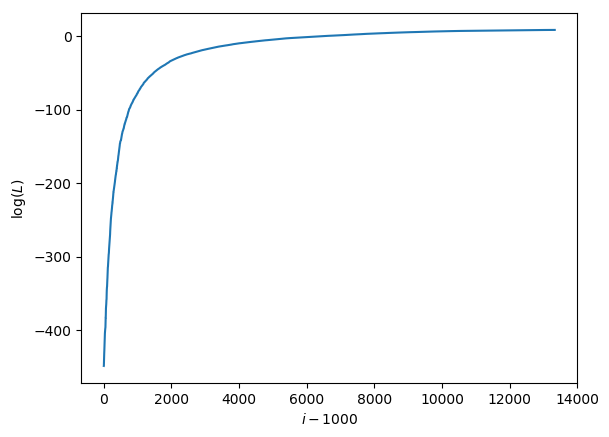

PyObject Text(28,0.5,u'$\\log(L)$')

In [86]:
plot(neststate.deadlogls[1000:end])
xlabel(L"$i - 1000$")
ylabel(L"$\log(L)$")

In [87]:
postsamples32, lnlike32 = EnsembleNest.postsample(neststate)

([-18.9233 -19.0143 … -18.9805 -18.951; 0.316543 0.0589675 … 0.236451 0.239035; … ; 1.55872 0.0379464 … 0.956302 0.988228; 1.24975 -2.71615 … 2.364 2.0112], [-2.69694, -2.59392, -2.15537, -2.14361, -2.0859, -1.58072, -1.35817, -1.33221, -1.31519, -1.26031  …  8.42652, 8.3371, 8.60723, 8.59353, 9.13706, 8.37461, 8.36917, 8.91816, 8.57247, 8.48365])

In [88]:
fmax = 1.0/(2*median(diff(xb158i[:,1]))) # As if median dt were Nyquist
df = 1.0/(xb158i[end,1]-xb158i[1,1]) # With spacing equal to 1/T
fs = collect(df:df:fmax)
psds = zeros(size(fs, 1), 1000)
for i in 1:1000
    p = postsamples32[:, rand(1:size(postsamples32,2))] # Choose a random posterior sample
    psds[:,i] = Kalman.psd(posterior, p, fs)
end

In [89]:
pmin = zeros(size(fs, 1))
pmax = zeros(size(fs, 1))
pmed = zeros(size(fs, 1))
for i in 1:size(fs, 1)
    pmin[i] = quantile(vec(psds[i,:]), 0.16)
    pmed[i] = median(vec(psds[i,:]))
    pmax[i] = quantile(vec(psds[i,:]), 0.84)
end

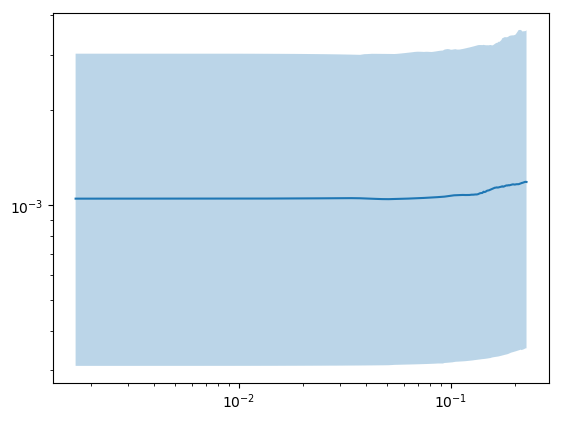

In [90]:
plot(fs, pmed)
fill_between(fs, pmax, pmin, alpha=0.3)
xscale("log")
yscale("log")